In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.optimize import curve_fit

%matplotlib inline

In [2]:
# Загрузка данных
df = pd.read_csv('EDA_analysis_short.csv')
df.head(3)

,date,Meteo:T1,AT_9:AIR1001C,SGK:FQIRC3702:Qm,AT_9:TIRCA574,AT_9:TIR706,AT_9:PIRSA3_53_55_avr,AT_9:PIRSA3_54_56_avr,AT_9:PIRC1080,AT_9:FIRC1026,...,AT_9:FQIR1001,y,hour,month,day,weekday,quarter,is_month_start,is_month_end,is_weekend
0,2020-01-17 16:00:00,-2.000000,844.676331,86.000000,96.503639,175.303802,-72.915840,-72.156085,0.039008,58.463827,...,627.227275,9.860729,16,1,17,4,1,0,0,0
1,2020-01-17 17:00:00,-2.000000,845.212219,86.188087,96.644729,174.857604,-74.030260,-72.004114,0.039014,59.066191,...,627.871743,9.873493,17,1,17,4,1,0,0,0
2,2020-01-17 18:00:00,-1.479823,844.935425,85.822365,96.785820,174.411406,-72.643047,-71.916380,0.039020,58.480010,...,628.516212,9.886178,18,1,17,4,1,0,0,0


In [3]:
#Скопируем датасет и удаляем ненужные столбцы
df_corr = df.copy()
df_corr.drop(['hour', 'month', 'day', 'weekday', 'quarter', 'is_month_start', 'is_month_end', 'is_weekend'], axis=1, inplace=True)
df_corr.head(3)

,date,Meteo:T1,AT_9:AIR1001C,SGK:FQIRC3702:Qm,AT_9:TIRCA574,AT_9:TIR706,AT_9:PIRSA3_53_55_avr,AT_9:PIRSA3_54_56_avr,AT_9:PIRC1080,AT_9:FIRC1026,AT_9:TIRC1070,AT_9:TIR1052,AT_9:TIRC1055_1064,AT_9:FIRC1025,AT_9:FIRC1024,AT_9:FIRC1027,AT_9:PIR1076,AT_9:FQIR1001,y
0,2020-01-17 16:00:00,-2.000000,844.676331,86.000000,96.503639,175.303802,-72.915840,-72.156085,0.039008,58.463827,114.616715,215.280787,358.691057,224.396619,359.992617,48.004063,0.069927,627.227275,9.860729
1,2020-01-17 17:00:00,-2.000000,845.212219,86.188087,96.644729,174.857604,-74.030260,-72.004114,0.039014,59.066191,114.450670,215.316577,358.492438,224.245862,360.117447,306.186182,0.069764,627.871743,9.873493
2,2020-01-17 18:00:00,-1.479823,844.935425,85.822365,96.785820,174.411406,-72.643047,-71.916380,0.039020,58.480010,114.380141,215.352367,358.444543,224.008700,360.023176,84.127519,0.069602,628.516212,9.886178


### Проверка и подготовка данных

#### Типы данных

In [4]:
df_corr.dtypes

date                      object
Meteo:T1                 float64
AT_9:AIR1001C            float64
SGK:FQIRC3702:Qm         float64
AT_9:TIRCA574            float64
AT_9:TIR706              float64
AT_9:PIRSA3_53_55_avr    float64
AT_9:PIRSA3_54_56_avr    float64
AT_9:PIRC1080            float64
AT_9:FIRC1026            float64
AT_9:TIRC1070            float64
AT_9:TIR1052             float64
AT_9:TIRC1055_1064       float64
AT_9:FIRC1025            float64
AT_9:FIRC1024            float64
AT_9:FIRC1027            float64
AT_9:PIR1076             float64
AT_9:FQIR1001            float64
y                        float64
dtype: object

In [5]:
df_corr['date'].unique

<bound method Series.unique of 0        2020-01-17 16:00:00
1        2020-01-17 17:00:00
2        2020-01-17 18:00:00
3        2020-01-17 19:00:00
4        2020-01-17 20:00:00
                ...         
17130    2022-01-31 19:00:00
17131    2022-01-31 20:00:00
17132    2022-01-31 21:00:00
17133    2022-01-31 22:00:00
17134    2022-01-31 23:00:00
Name: date, Length: 17135, dtype: object>

#### Разделим столбец 'date' на 'year', 'month', 'day', 'hour' и приведем к типу 'int'

In [6]:
#Извлекаем данные
year = [i[:4] for i in df_corr['date'].values]
month = [i[5:7] for i in df_corr['date'].values]
day = [i[8:10] for i in df_corr['date'].values]
hour = [i[11:13] for i in df_corr['date'].values]

#Добавляем новые столбцы и удаляем столбец 'date'
df_corr['year'] = year
df_corr['month'] = month
df_corr['day'] = day
df_corr['hour'] = hour
df_corr = df_corr.drop(['date'], axis=1)

#Меняем тип данных новых столбцов
df_corr = df_corr.astype ({'year': 'int64', 'month': 'int64', 'day': 'int64', 'hour': 'int64'})

df_corr.head(3)

,Meteo:T1,AT_9:AIR1001C,SGK:FQIRC3702:Qm,AT_9:TIRCA574,AT_9:TIR706,AT_9:PIRSA3_53_55_avr,AT_9:PIRSA3_54_56_avr,AT_9:PIRC1080,AT_9:FIRC1026,AT_9:TIRC1070,...,AT_9:FIRC1025,AT_9:FIRC1024,AT_9:FIRC1027,AT_9:PIR1076,AT_9:FQIR1001,y,year,month,day,hour
0,-2.000000,844.676331,86.000000,96.503639,175.303802,-72.915840,-72.156085,0.039008,58.463827,114.616715,...,224.396619,359.992617,48.004063,0.069927,627.227275,9.860729,2020,1,17,16
1,-2.000000,845.212219,86.188087,96.644729,174.857604,-74.030260,-72.004114,0.039014,59.066191,114.450670,...,224.245862,360.117447,306.186182,0.069764,627.871743,9.873493,2020,1,17,17
2,-1.479823,844.935425,85.822365,96.785820,174.411406,-72.643047,-71.916380,0.039020,58.480010,114.380141,...,224.008700,360.023176,84.127519,0.069602,628.516212,9.886178,2020,1,17,18


In [7]:
df_corr.dtypes

Meteo:T1                 float64
AT_9:AIR1001C            float64
SGK:FQIRC3702:Qm         float64
AT_9:TIRCA574            float64
AT_9:TIR706              float64
AT_9:PIRSA3_53_55_avr    float64
AT_9:PIRSA3_54_56_avr    float64
AT_9:PIRC1080            float64
AT_9:FIRC1026            float64
AT_9:TIRC1070            float64
AT_9:TIR1052             float64
AT_9:TIRC1055_1064       float64
AT_9:FIRC1025            float64
AT_9:FIRC1024            float64
AT_9:FIRC1027            float64
AT_9:PIR1076             float64
AT_9:FQIR1001            float64
y                        float64
year                       int64
month                      int64
day                        int64
hour                       int64
dtype: object

#### Проверка на пропуски

In [8]:
df_corr.isna().sum()

Meteo:T1                    0
AT_9:AIR1001C            1574
SGK:FQIRC3702:Qm          322
AT_9:TIRCA574               0
AT_9:TIR706                 0
AT_9:PIRSA3_53_55_avr       0
AT_9:PIRSA3_54_56_avr       0
AT_9:PIRC1080               9
AT_9:FIRC1026               0
AT_9:TIRC1070               0
AT_9:TIR1052                0
AT_9:TIRC1055_1064          0
AT_9:FIRC1025               0
AT_9:FIRC1024               0
AT_9:FIRC1027               1
AT_9:PIR1076                0
AT_9:FQIR1001               0
y                           0
year                        0
month                       0
day                         0
hour                        0
dtype: int64

In [9]:
#Удаляем строки с пропусками
df_corr.dropna(inplace=True)

In [10]:
df_corr.isna().sum()

Meteo:T1                 0
AT_9:AIR1001C            0
SGK:FQIRC3702:Qm         0
AT_9:TIRCA574            0
AT_9:TIR706              0
AT_9:PIRSA3_53_55_avr    0
AT_9:PIRSA3_54_56_avr    0
AT_9:PIRC1080            0
AT_9:FIRC1026            0
AT_9:TIRC1070            0
AT_9:TIR1052             0
AT_9:TIRC1055_1064       0
AT_9:FIRC1025            0
AT_9:FIRC1024            0
AT_9:FIRC1027            0
AT_9:PIR1076             0
AT_9:FQIR1001            0
y                        0
year                     0
month                    0
day                      0
hour                     0
dtype: int64

### Матрица корреляций

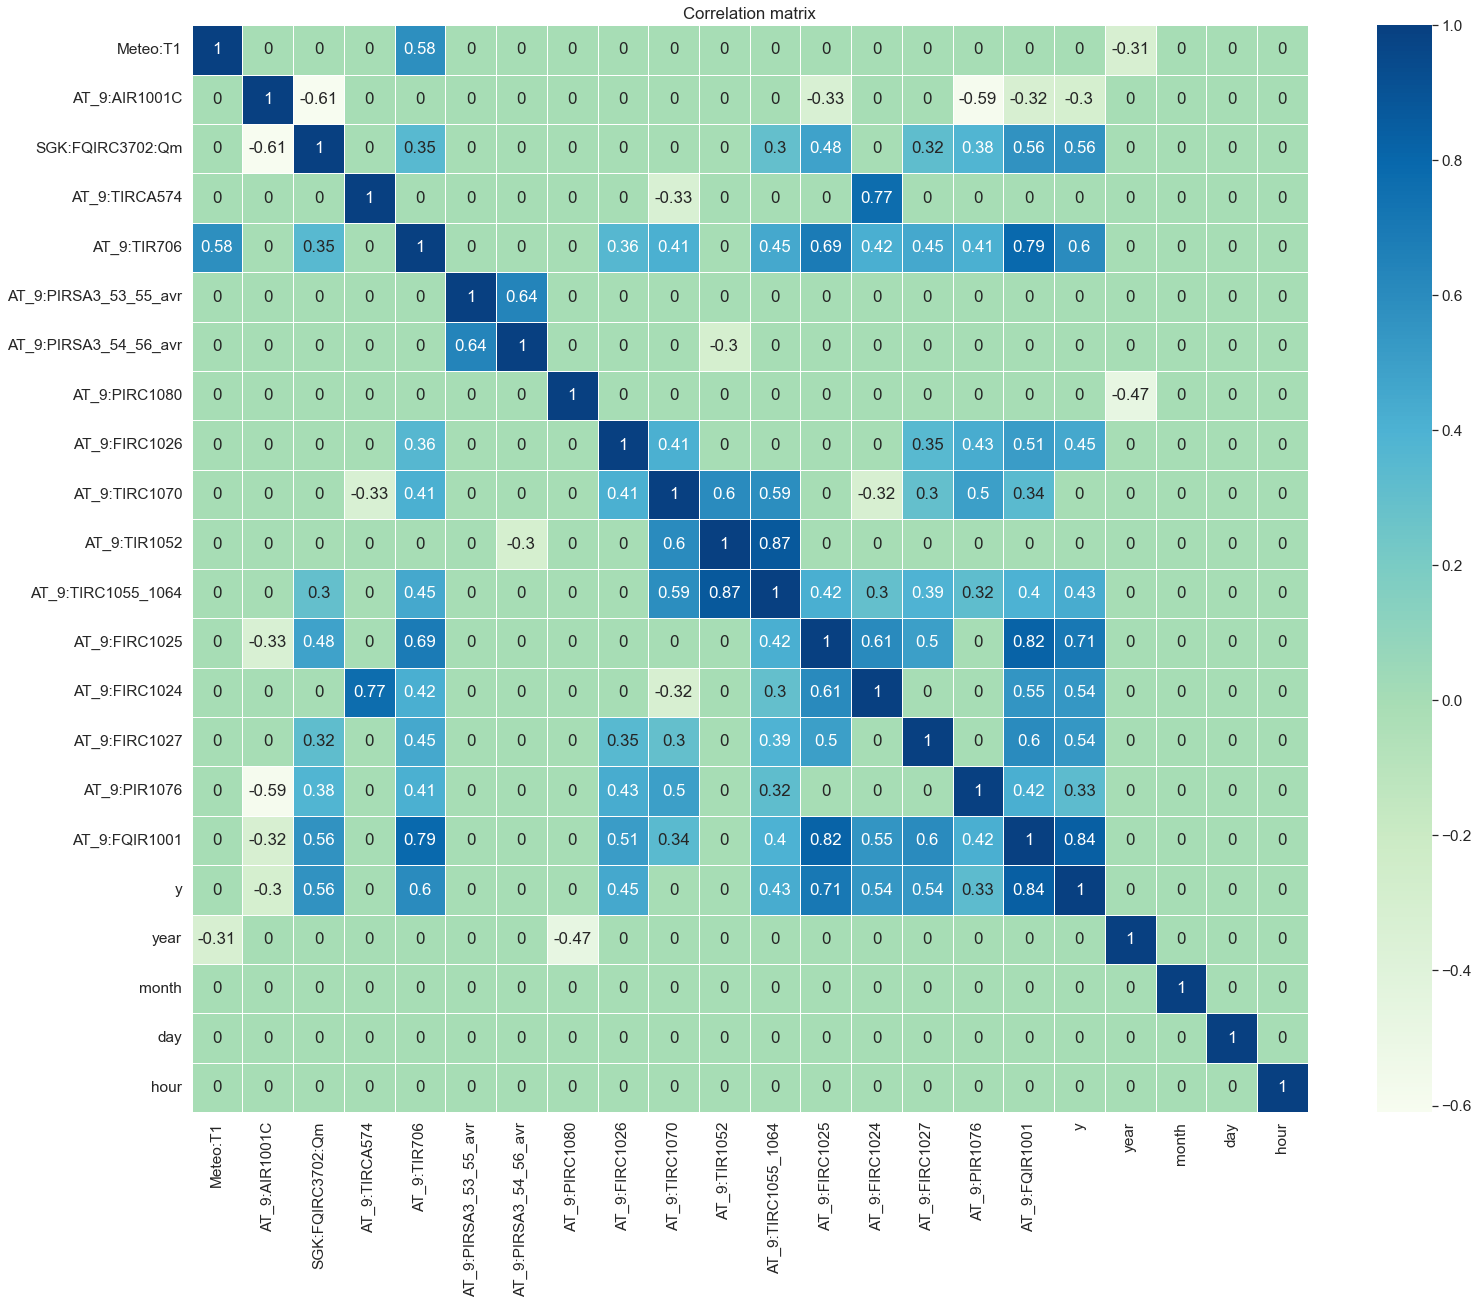

In [11]:
plt.figure(figsize = (25,20))

sns.set(font_scale=1.4)

corr_matrix = df_corr.corr()
corr_matrix = np.round(corr_matrix, 2)
corr_matrix[np.abs(corr_matrix) < 0.3] = 0

sns.heatmap(corr_matrix, annot=True, linewidths=.5, cmap='GnBu')

plt.title('Correlation matrix')
plt.show()

In [12]:
# Создадим функции для аппроксимаций

# Логарифмическая функция
def log_func(x, a, b):
    return a * np.log(x) + b

# Степенная функция
def pow_func(x, a, b):
    return a * b ** x

In [13]:
# Подбор оптимальных параметров

log_opt, log_cov = curve_fit(log_func, df_corr['AT_9:AIR1001C'], df_corr['y'])
pow_opt, pow_cov = curve_fit(pow_func, df_corr['AT_9:AIR1001C'], df_corr['y'])

In [14]:
# Делаем прогнозы по полученным кривым
log_y_projected = log_func(np.arange(1000), *log_opt)
pow_y_projected = pow_func(np.arange(1000), *pow_opt)

C:\Users\tolpers\AppData\Local\Temp/ipykernel_17976/1660336501.py:5: RuntimeWarning: divide by zero encountered in log
  return a * np.log(x) + b


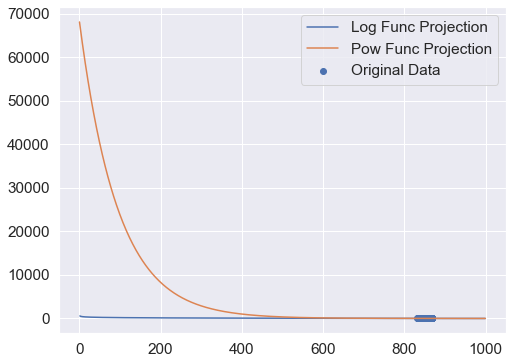

In [15]:
plt.figure(figsize=(8, 6))
plt.scatter(df['AT_9:AIR1001C'], df['y'], label='Original Data')
plt.plot(log_y_projected, label='Log Func Projection')
plt.plot(pow_y_projected, label='Pow Func Projection')
plt.legend()